In [1]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [2]:
dataset = keras.datasets.fashion_mnist

In [3]:
((imagens_treino, identificadores_treino),(imagens_teste, identificadores_teste)) = dataset.load_data()

imagens_treino.shape
imagens_teste.shape

(10000, 28, 28)

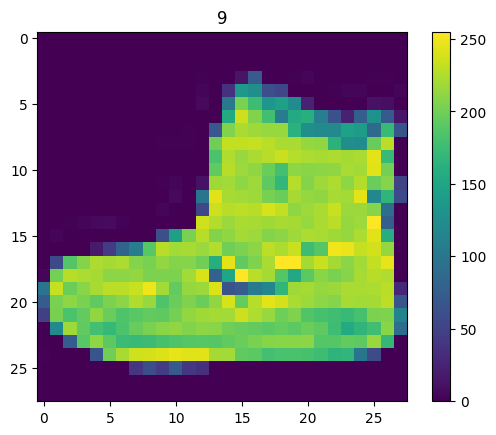

In [4]:
plt.imshow(imagens_treino[0])
plt.title(identificadores_treino[0])
total_class = 10
nomes_class = ['Camiseta', 'calca', 'Pullover', 'Vestido', 'Sobretudo', 'Sandalia', 'Short', 'Tenis', 'Bolsa', 'Bota']

'''
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_class[identificadores_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()


In [5]:
#normalização
imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           #keras.layers.Dense(64, activation=tensorflow.nn.relu),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificadores_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5280 - accuracy: 0.8130 - val_loss: 0.4068 - val_accuracy: 0.8525
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3980 - accuracy: 0.8555 - val_loss: 0.3794 - val_accuracy: 0.8627
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3616 - accuracy: 0.8673 - val_loss: 0.3704 - val_accuracy: 0.8659
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3389 - accuracy: 0.8743 - val_loss: 0.3256 - val_accuracy: 0.8827
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3215 - accuracy: 0.8817 - val_loss: 0.3437 - val_accuracy: 0.8768


In [10]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')

modelo_salvo = load_model('modelo.h5')

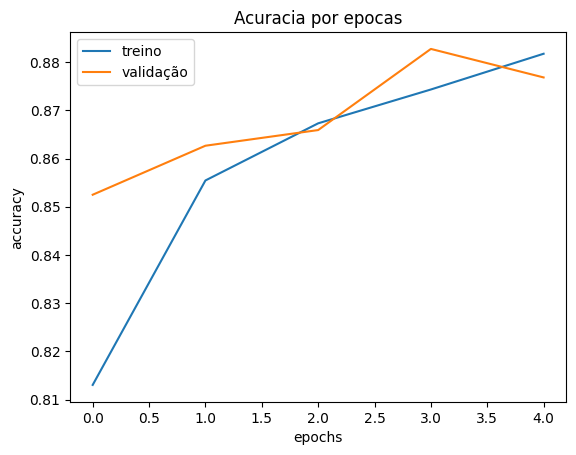

In [6]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acuracia por epocas')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['treino', 'validação'])

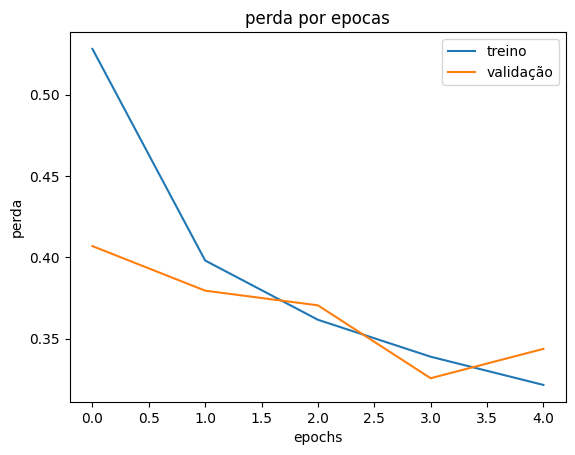

In [7]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('perda por epocas')
plt.xlabel('epochs')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [12]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('numero da imagem do teste:', identificadores_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado modelo teste:', np.argmax(testes_modelo_salvo[1]))
print('numero da imagem do teste:', identificadores_teste[1])

313/313 [==============================] - 1s 2ms/step
resultado teste: 2
numero da imagem do teste: 2
313/313 [==============================] - 1s 2ms/step
resultado modelo teste: 2
numero da imagem do teste: 2


In [7]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificadores_teste)

print('perda teste:',perda_teste)
print('acuracia teste:',acuracia_teste)

313/313 [==============================] - 1s 3ms/step - loss: 66.1196 - accuracy: 0.8416
perda teste: 66.1196060180664
acuracia teste: 0.8416000008583069
